In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


# 1. Import library and load csv(DataSet)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,  VotingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Regularization, Estimator
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import mean_squared_log_error # RMSLE
from sklearn.metrics import mean_squared_error # RMSE

# Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor

# Scaler, Encoder, Regulariation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import category_encoders as ce

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

In [4]:
train.shape, test.shape, submission.shape

((1117957, 22), (745305, 21), (745305, 2))

# Preparation for EDA

In [5]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0.000,1.00,2.00,3.000,4.000,5.00,6.00,7.000,8.000,9.000
MonsoonIntensity,5.000,6.00,6.00,3.000,5.000,5.00,8.00,6.000,5.000,4.000
TopographyDrainage,8.000,7.00,5.00,4.000,3.000,4.00,3.00,6.000,2.000,2.000
RiverManagement,5.000,4.00,6.00,6.000,2.000,1.00,1.00,5.000,8.000,3.000
Deforestation,8.000,4.00,7.00,5.000,6.000,4.00,2.00,7.000,5.000,5.000
Urbanization,6.000,8.00,3.00,4.000,4.000,2.00,3.00,5.000,4.000,8.000
ClimateChange,4.000,8.00,7.00,8.000,4.000,4.00,7.00,5.000,5.000,6.000
DamsQuality,4.000,3.00,1.00,4.000,3.000,6.00,3.00,3.000,2.000,5.000
Siltation,3.000,5.00,5.00,7.000,3.000,6.00,4.00,5.000,4.000,5.000
AgriculturalPractices,3.000,4.00,4.00,6.000,3.000,7.00,6.00,5.000,5.000,7.000


In [6]:
test.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,1117957,1117958,1117959,1117960,1117961,1117962,1117963,1117964,1117965,1117966
MonsoonIntensity,4,4,1,2,6,3,5,6,6,4
TopographyDrainage,6,4,3,4,3,4,5,9,5,8
RiverManagement,3,2,6,4,2,8,6,6,2,8
Deforestation,5,9,5,6,4,4,8,5,4,4
Urbanization,6,5,7,4,6,6,6,5,6,7
ClimateChange,7,5,2,5,4,5,5,5,4,7
DamsQuality,8,4,4,4,5,2,3,3,5,4
Siltation,7,7,6,3,5,5,6,8,8,1
AgriculturalPractices,8,5,4,4,3,9,9,10,4,3


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

- All parameters dtype are int64
- Target value : FloodProbability

1. 'Id' is Index header, so it should be dropped

In [8]:
train, train_id  = train.drop(['id'], axis=1), train['id']
test, test_id = test.drop(['id'], axis=1), test['id']

2. Create feature's list which na value's propotion is bigger than 0.2

In [9]:
na_columns = []

for col in train.columns.tolist() :
  if train[col].isna().sum() > train.shape[0]*0.1 :
    print(col, train[col].isna().sum())
    na_columns.append(col)

na_columns # Only a few Na value exist

[]

3. Create co-relation matrix (with target)

In [10]:
# Corr : Numeric features & target('FloodProbability')
# Print when abs value is lower than 0.05
low_corr_num_cols = []

for i, n in enumerate(train[train.columns].corr().iloc[:, -1]) :
  if abs(n) < 0.05 :
    print(num_cols[i], n)
    low_corr_num_cols.append(num_cols[i])

low_corr_num_cols

[]

# 3. Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FloodProbability', ylabel='Count'>

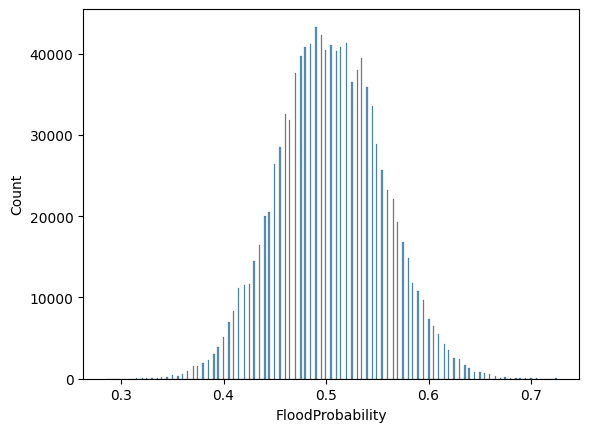

In [11]:
sns.histplot(train['FloodProbability']) # target's distribtuion shapes like normal distribution

In [12]:
num_cols = train.select_dtypes(include = ['int64']).columns
len(num_cols)

20

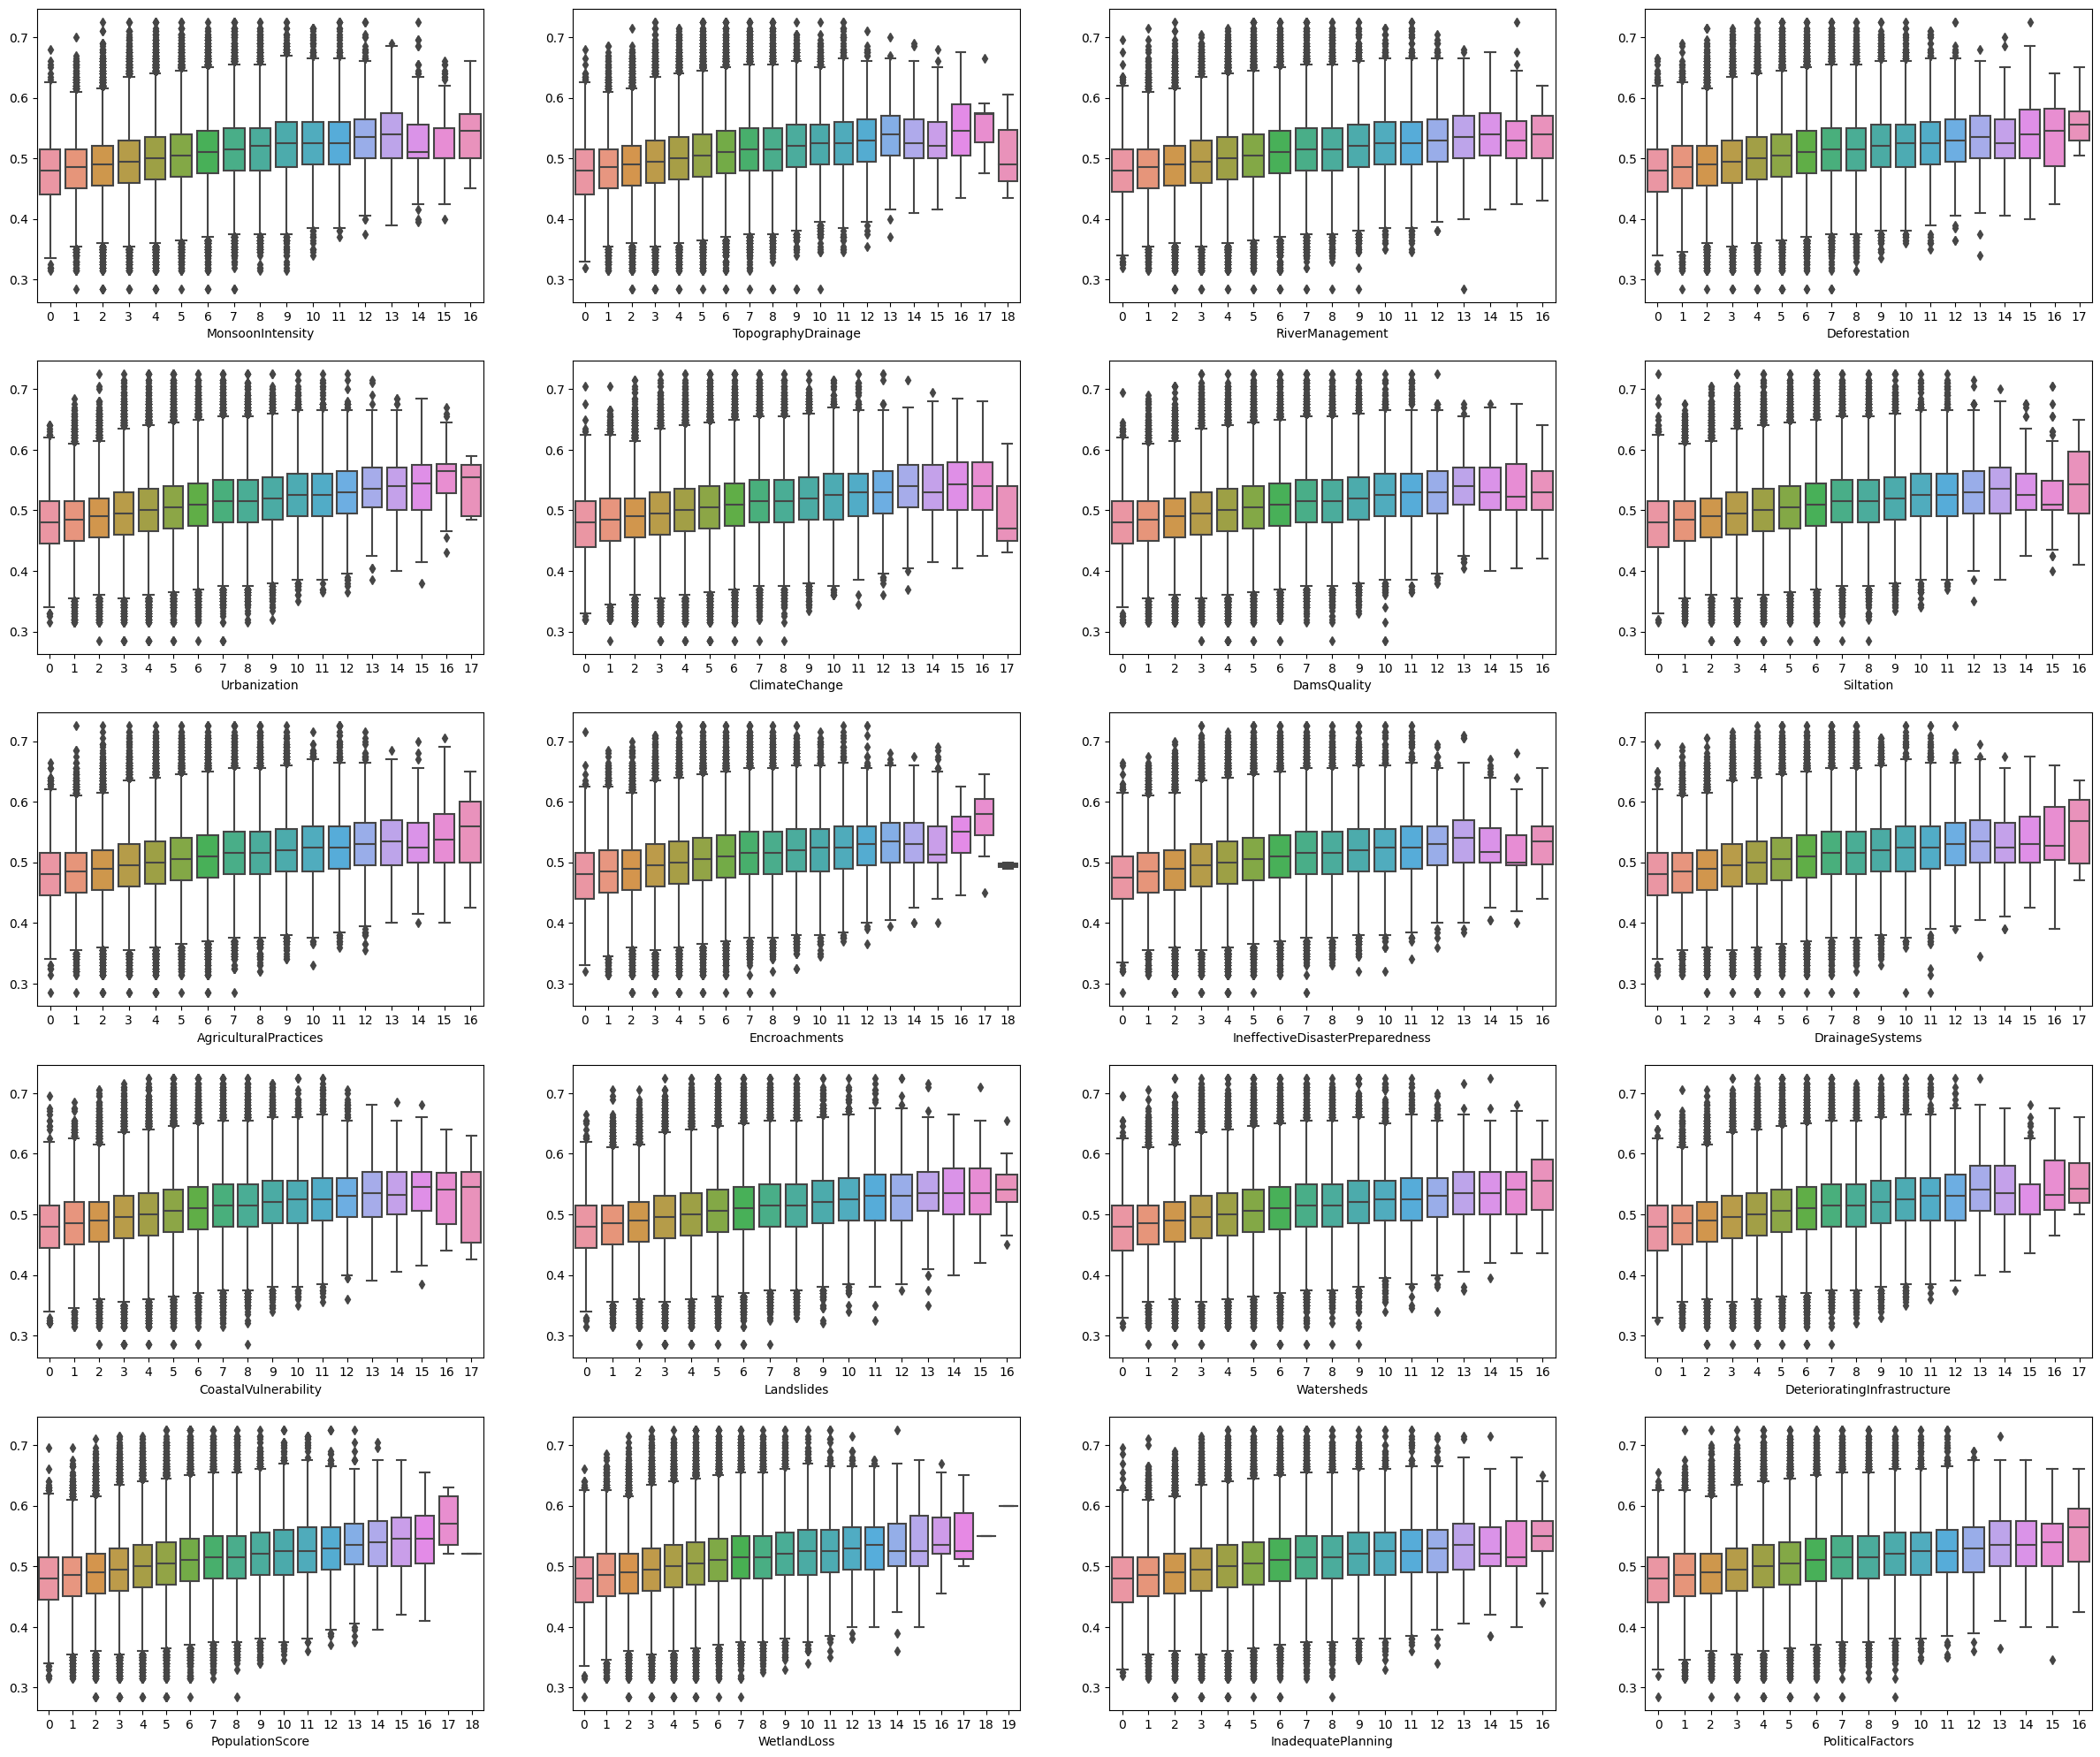

In [13]:
figure, axes = plt.subplots(nrows=5, ncols=4, label='off', figsize=(30, 25))
n = 0

for i in range(5) :
  for j in range(4) :
    sns.boxplot(x=num_cols[n], y=train['FloodProbability'], data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

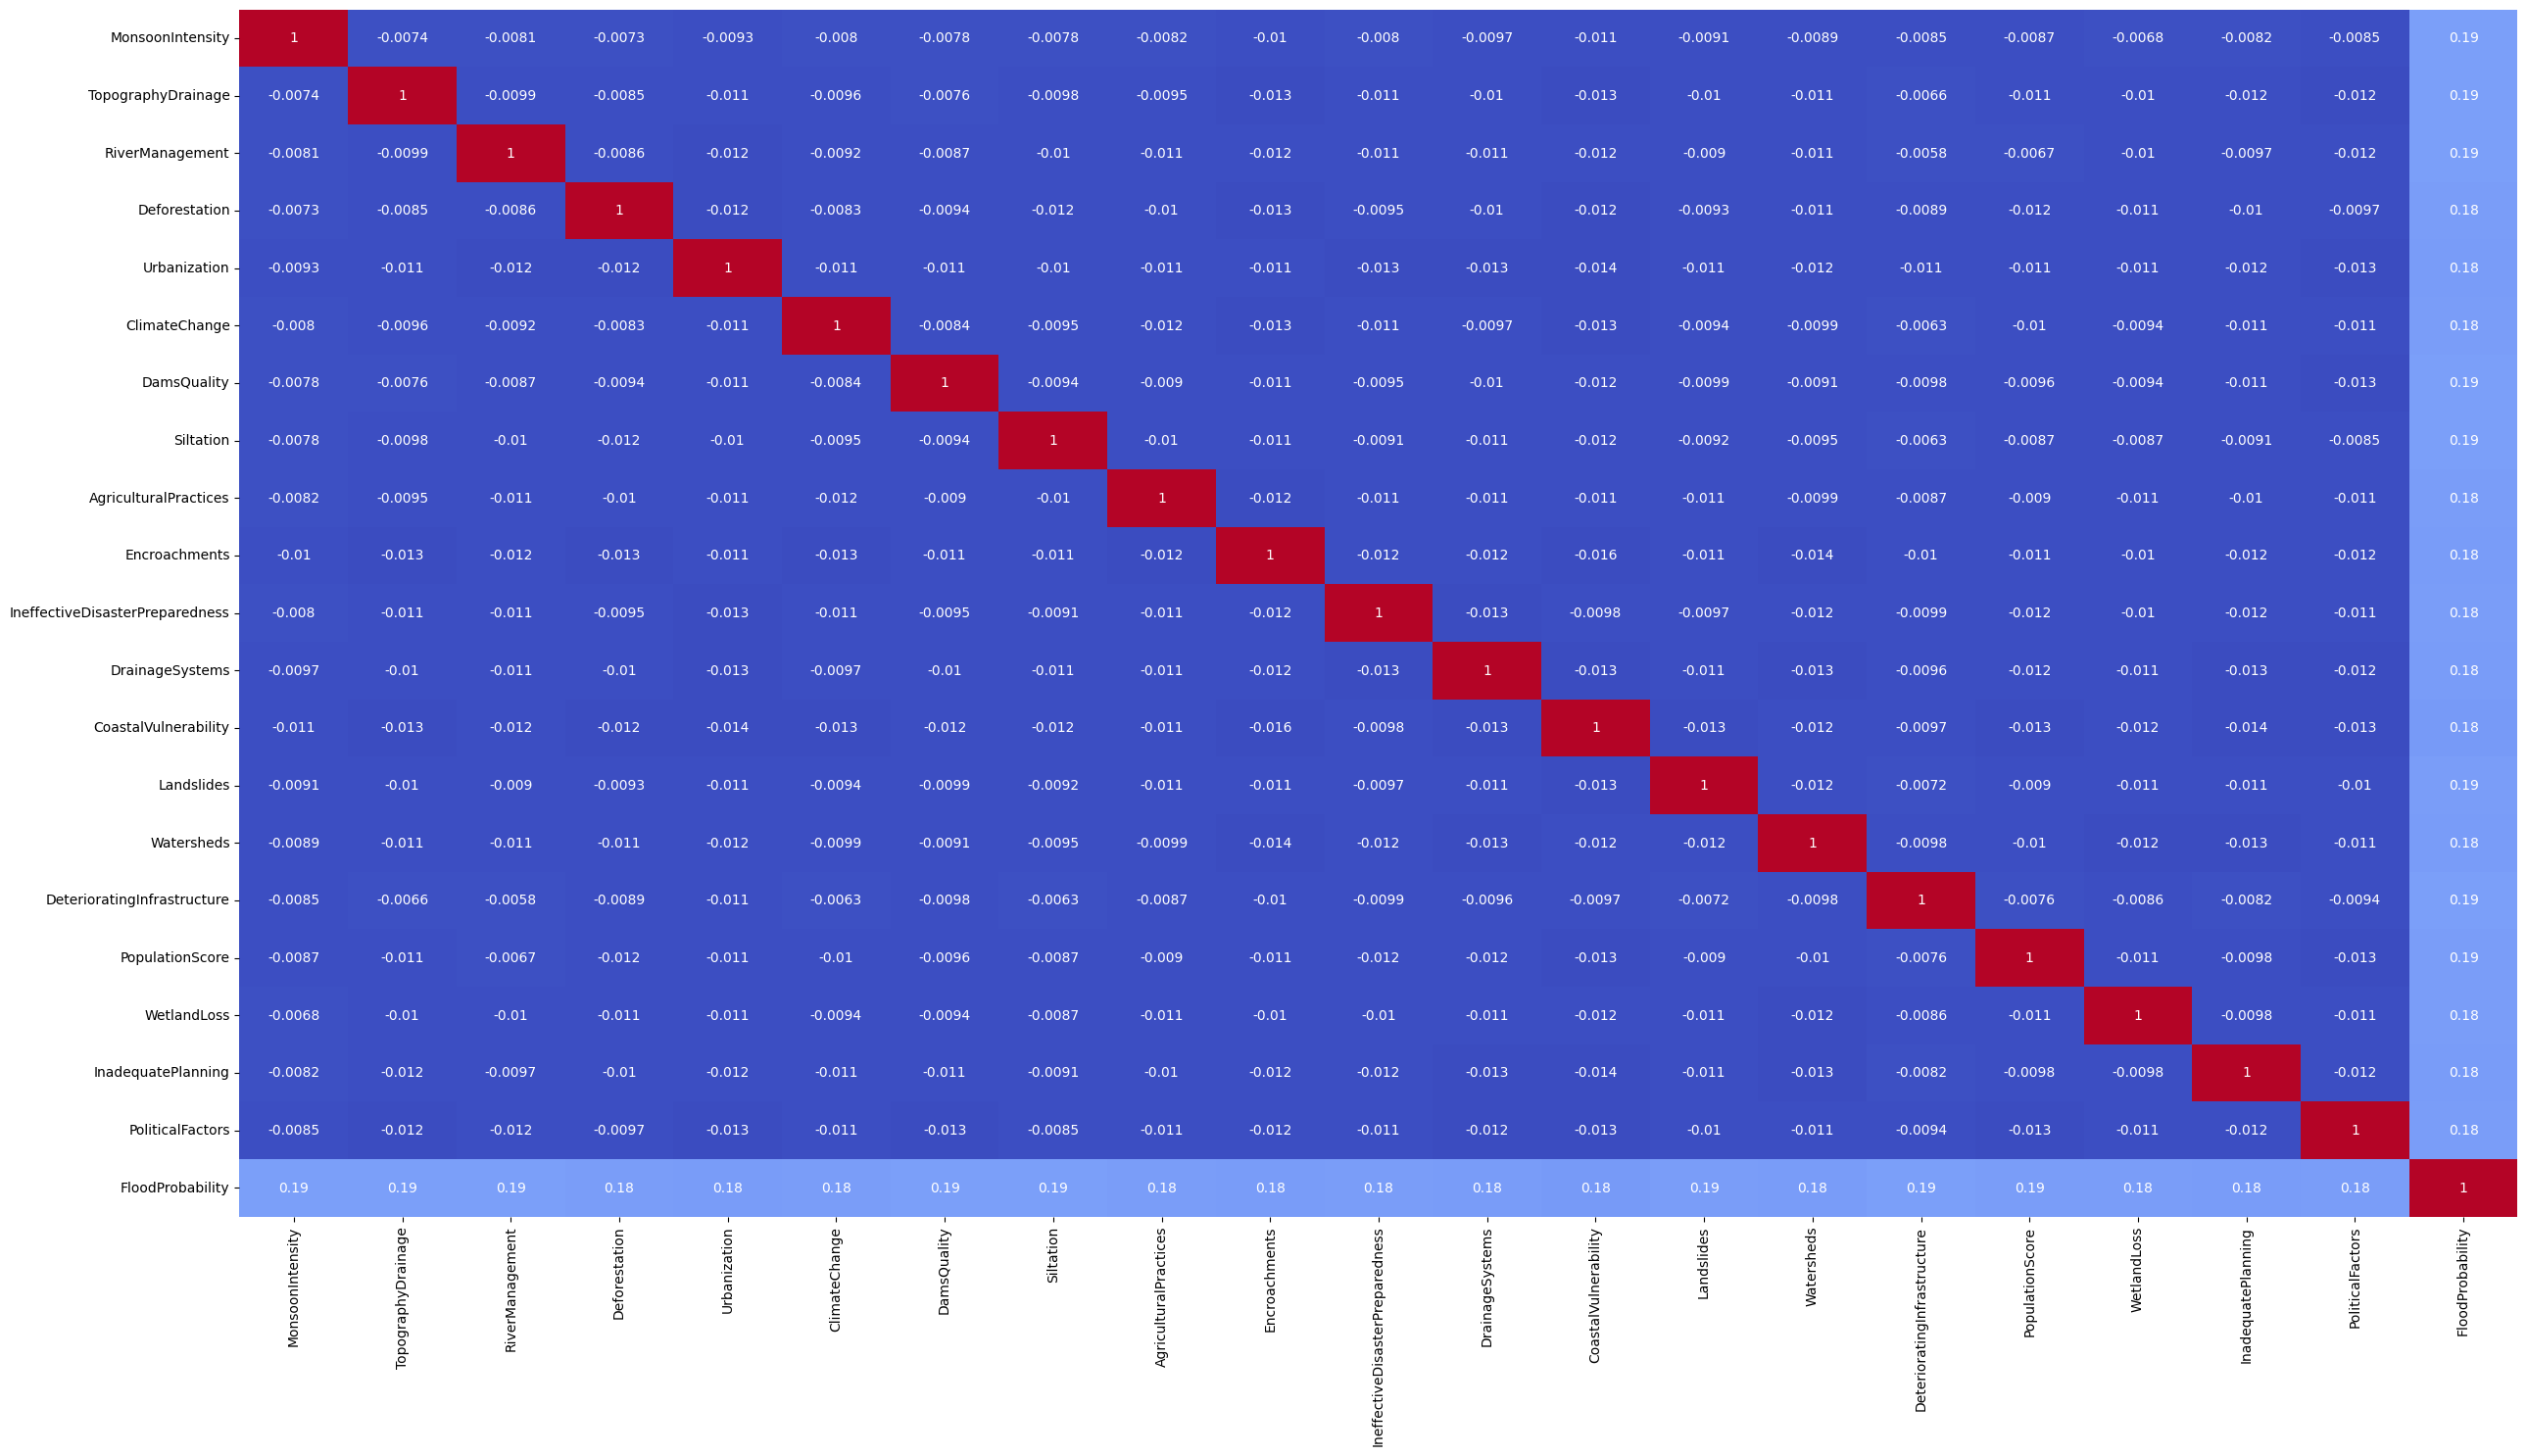

In [14]:
# Create Heatmap (header-target)
plt.figure(figsize=(30, 16))
heatmap = sns.heatmap(train.corr(),annot=True, cmap='coolwarm', cbar=False)

- Features co-relation is almost same(0.18~0.19)

# Model Baseline

In [15]:
col_list = train.columns.tolist()

# Create unique value list using 'col_list'
value_list = {col: train[col].unique().tolist() for col in col_list}

for col in col_list:
    for value in value_list[col]:
        if col != 'FloodProbability':  # FloodProbability
            subset_df = train[train[col] == value]
            Q1, Q3 = subset_df['FloodProbability'].quantile([0.25, 0.75])
            IQR = Q3 - Q1
            
            min_value = Q1 - 1.5 * IQR
            max_value = Q3 + 1.5 * IQR
            
            # Detect and remove outlier
            condition = (subset_df['FloodProbability'] < min_value) | (subset_df['FloodProbability'] > max_value)
            outliers = subset_df[condition].index
            train = train.drop(outliers)

In [16]:
train.shape, test.shape, submission.shape

((1099361, 21), (745305, 20), (745305, 2))

In [17]:
X_train, y_train = train.drop(['FloodProbability'], axis=1), train['FloodProbability']

In [18]:
StandardScaler().fit(X_train)
StandardScaler().fit(test)

StandardScaler()

In [19]:
lin_model = LinearRegression()

In [20]:
lin_model_01 = lin_model.fit(X_train, y_train)

In [21]:
from sklearn.metrics import r2_score

r2_score(lin_model_01.predict(X_train), y_train) # linear_model score

0.7890695366733302

In [22]:
lin_pred = lin_model_01.predict(test)

In [23]:
lin_submission = pd.DataFrame({'id':test_id, 'FloodProbability':lin_pred})

In [24]:
lin_submission.head()

,id,FloodProbability
0,1117957,0.573404
1,1117958,0.455448
2,1117959,0.454969
3,1117960,0.466396
4,1117961,0.466224


In [25]:
lin_submission.to_csv('lin_submission.csv', index=False)

# CatBoosting

In [26]:
cat_boost = CatBoostRegressor(verbose = False, allow_writing_files = False)

In [27]:
cat_boost.fit(X_train, y_train)

In [28]:
r2_score(cat_boost.predict(X_train), y_train)

0.795931174587577

In [29]:
cat_pred = cat_boost.predict(test)

In [30]:
cat_submission = pd.DataFrame({'id':test_id, 'FloodProbability':cat_pred})

In [31]:
cat_submission.head()

,id,FloodProbability
0,1117957,0.574953
1,1117958,0.455429
2,1117959,0.455072
3,1117960,0.466454
4,1117961,0.465114


In [32]:
cat_submission.to_csv('cat_submission.csv', index=False)